In [21]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
mbti = pd.read_csv('data/train.csv')

# List of mbti types 
type_labels = ['ISTJ', 'ISFJ', 'INFJ', 'INTJ', 
               'ISTP', 'ISFP', 'INFP', 'INTP', 
               'ESTP', 'ESFP', 'ENFP', 'ENTP', 
               'ESTJ', 'ESFJ', 'ENFJ', 'ENTJ']

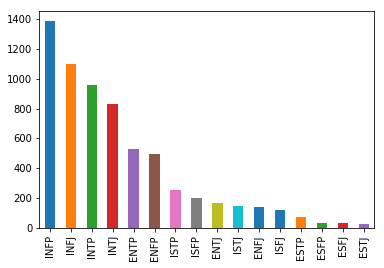

In [23]:
mbti['type'].value_counts().plot(kind = 'bar')


Lets increase the size of the dataset by converting each of the 50 posts into the `posts` column into its own row.

In [24]:

all_mbti = []
for i, row in mbti.iterrows():
    for post in row['posts'].split('|||'):
        all_mbti.append([row['type'], post])
all_mbti = pd.DataFrame(all_mbti, columns=['type', 'post'])

In [25]:
print(f"before:  {mbti.shape} \nafter: {all_mbti.shape}")

before:  (6506, 2) 
after: (316548, 2)


In [26]:
pd.concat([mbti['type'].value_counts().to_frame(name='before'), all_mbti['type'].value_counts().to_frame(name='after')],axis=1)

,before,after
ENFJ,143,6947
ENFP,496,23925
ENTJ,167,8174
ENTP,530,26017
ESFJ,35,1668
ESFP,36,1663
ESTJ,30,1495
ESTP,71,3437
INFJ,1100,53807
INFP,1386,67846


In [27]:
all_mbti.head()

,type,post
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw
1,INFJ,http://41.media.tumblr.com/tumblr_lfouy03PMA1q...
2,INFJ,enfp and intj moments https://www.youtube.com...
3,INFJ,What has been the most life-changing experienc...
4,INFJ,http://www.youtube.com/watch?v=vXZeYwwRDw8 h...


for Binary Classification of features, split introvert/extrovert, judgemental/perception, etc

In [28]:
def split_type(row):
    ''' 
       Split MBTI type into individual features for Binary Classification
       eg ENFP = [0 1 0 0]
    '''
    t = row['type']
    I,N,T,J = 0,0,0,0
    
    I = 1 if t[0] =='I' else 0
    
    N = 1 if t[1] == 'N' else 0
    
    T = 1 if t[2] == 'T' else 0
    
    J = 1 if t[3] == 'J' else 0
    
    return pd.Series( {'IE':I, 'NS':N , 'TF': T, 'JP': J }) 

In [29]:
all_mbti = all_mbti.join(all_mbti.apply(lambda row: split_type(row), axis=1))
all_mbti.head(5)

,type,post,IE,JP,NS,TF
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw,1,1,1,0
1,INFJ,http://41.media.tumblr.com/tumblr_lfouy03PMA1q...,1,1,1,0
2,INFJ,enfp and intj moments https://www.youtube.com...,1,1,1,0
3,INFJ,What has been the most life-changing experienc...,1,1,1,0
4,INFJ,http://www.youtube.com/watch?v=vXZeYwwRDw8 h...,1,1,1,0


In [30]:
# rearrange columns
all_mbti = all_mbti[['type', 'IE', 'NS', 'TF', 'JP', 'post']]

In [31]:
all_mbti.head()

,type,IE,NS,TF,JP,post
0,INFJ,1,1,0,1,'http://www.youtube.com/watch?v=qsXHcwe3krw
1,INFJ,1,1,0,1,http://41.media.tumblr.com/tumblr_lfouy03PMA1q...
2,INFJ,1,1,0,1,enfp and intj moments https://www.youtube.com...
3,INFJ,1,1,0,1,What has been the most life-changing experienc...
4,INFJ,1,1,0,1,http://www.youtube.com/watch?v=vXZeYwwRDw8 h...


In [36]:
mbti_num_feat = pd.read_csv('data/all_mbti_feat.csv').drop('Unnamed: 0', axis=1)

In [ ]:
mbti_num_feat = mbti_num_feat.join(mbti_num_feat.apply(lambda row: split_type(row), axis=1))
mbti_num_feat.head(5)

In [34]:
mbti_num_feat.columns.tolist()

['Unnamed: 0',
 'type',
 'post',
 'questions',
 'exclaimed',
 'elipses',
 'emojis',
 'word_count',
 'big_words',
 'images',
 'words_all_caps',
 'IE',
 'JP',
 'NS',
 'TF']

#### my own stopwords list

In [69]:
my_stopwords = ['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren',
"aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can',
'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't",
'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't",
'have', 'haven', "haven't", 'having',  'how', 'if', 'in', 'into', 'is', 'isn', "isn't", 'it', "it's", 'its',
'itself', 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'needn',
"needn't", 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she', "she's", 'should', "should've",
'shouldn', "shouldn't", 'so', 'some', 'such', 't', 'than', 'that', "that'll", 'the', 'then', 'there', 'these',
'this', 'those', 'through', 'to', 'too', 'under', 'until', 'up', 've', 'very', 'was', 'wasn', "wasn't", 'we',
'were', 'weren', "weren't", 'what', 'when', 'where', 'which', 'while', 'who', 'whom', 'why', 'will', 'with',
'won', "won't", 'wouldn', "wouldn't", 'y','ISTJ', 'ISFJ', 'INFJ', 'INTJ', 
               'ISTP', 'ISFP', 'INFP', 'INTP', 
               'ESTP', 'ESFP', 'ENFP', 'ENTP', 
               'ESTJ', 'ESFJ', 'ENFJ', 'ENTJ']

### Pipelines

try different classifyers

In [15]:
from sklearn.pipeline import Pipeline